# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) \, \mathrm{d}x = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 
import scipy
from scipy.optimize import curve_fit

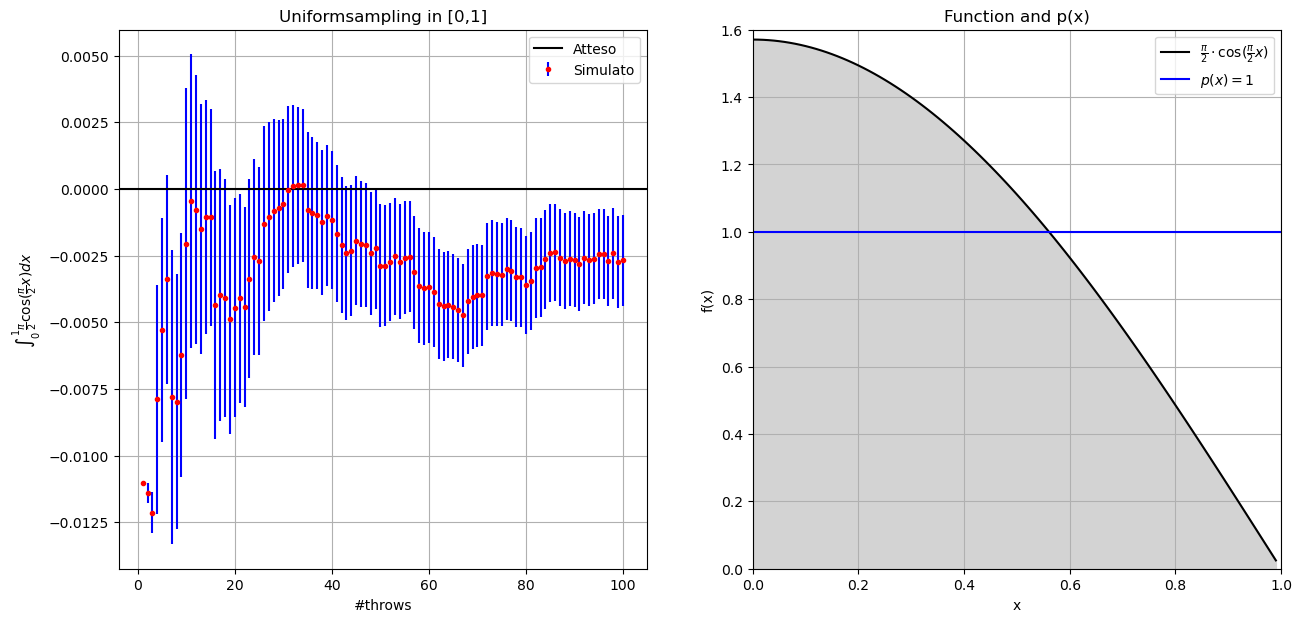

In [11]:
#1.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

x, y , error = np.loadtxt("data/uniform.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax1.errorbar(x,y-1,yerr=error, label='Simulato', color='red',ecolor='blue', fmt='.')
ax1.axhline(y=0, color='black', linestyle='-', label='Atteso')  
ax1.set(xlabel='#throws', ylabel=r'$\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x)dx$')
ax1.set_title('Uniformsampling in [0,1]')

x = np.arange(0,1,0.01) # generate x values from 0 to 1 with step 1
ax2.plot(x,np.pi/2*np.cos(np.pi/2*x), label=r'$\frac{\pi}{2}\cdot\cos(\frac{\pi}{2}x)$', color='black')
ax2.axhline(y=1, color='blue', linestyle='-', label=r'$p(x)= 1$')
ax2.set(xlabel='x', ylabel='f(x)')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1.6)
ax2.set_title('Function and p(x)')
ax2.fill_between(x, np.pi/2*np.cos(np.pi/2*x), 0, color='lightgray')

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.show()

As a first Monte Carlo algorithm we can sample x uniformly on (0,1):  
$$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{1} \cdot 1  \, \mathrm{d}x = 1$$

the variance connected with this choice is
$$\sigma_I^2 = \langle g^2 \rangle_p - \langle g \rangle^2_p = \int_0^1 \left( \frac{\frac{\pi}{2}\cos(\pi x/2)}{1} \right)^2 \cdot 1 \, \mathrm{d}x - I^2 = \frac{\pi^2}{8}-1 \approx 0.2337$$

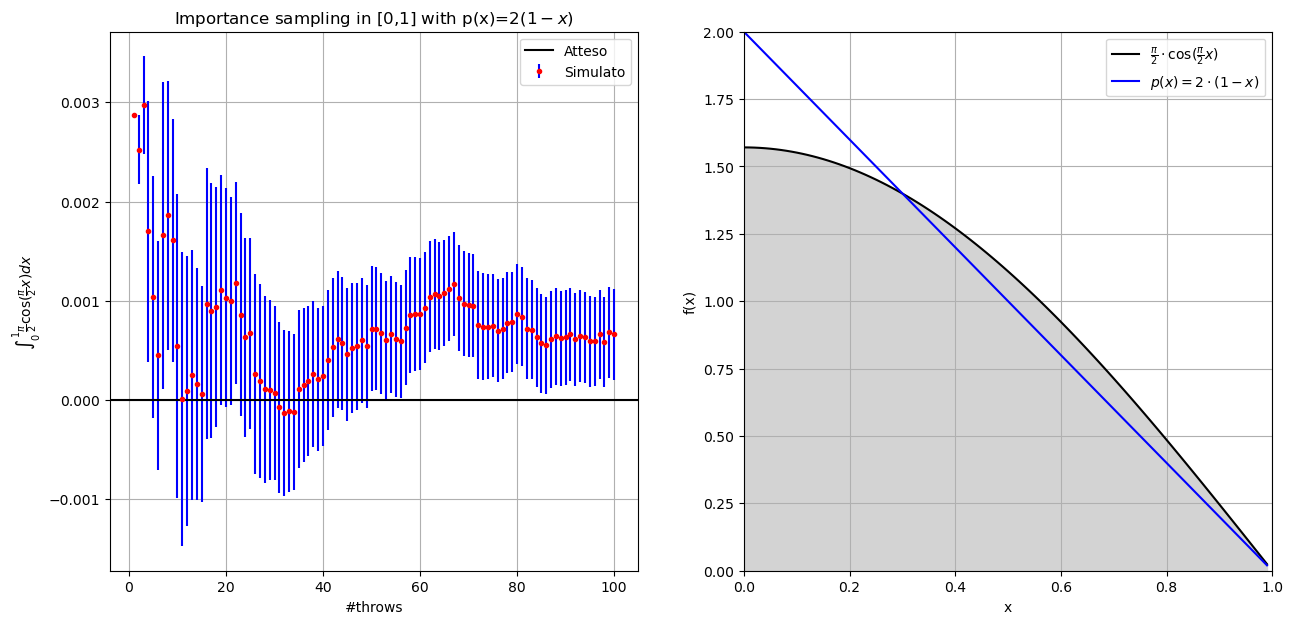

In [12]:
#mportance sample with p(x)=2(1-x)  for x in [0,1]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

x, y , error = np.loadtxt("data/importance_sample.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax1.errorbar(x,y-1,yerr=error, label='Simulato', color='red',ecolor='blue', fmt='.')
ax1.axhline(y=0, color='black', linestyle='-', label='Atteso')  
ax1.set(xlabel='#throws', ylabel=r'$\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x)dx$')
ax1.set_title(r'Importance sampling in [0,1] with p(x)=$2(1-x)$')

x = np.arange(0,1,0.01) # generate x values from 0 to 1 with step 1
ax2.plot(x,np.pi/2*np.cos(np.pi/2*x), label=r'$\frac{\pi}{2}\cdot\cos(\frac{\pi}{2}x)$', color='black')
ax2.plot(x,2*(1-x), color='blue', linestyle='-', label=r'$p(x)=2 \cdot (1-x)$')
ax2.set(xlabel='x', ylabel='f(x)')
ax2.set_xlim(0,1)
ax2.set_ylim(0,2)
ax2.fill_between(x,0,np.pi/2*np.cos(np.pi/2*x), color='lightgrey')

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.show()


Importance sampling: using p(x) =   $2 \cdot (1-x)$
$$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{2\cdot(1-x)} \cdot 2\cdot(1-x)  \, \mathrm{d}x = 1$$

the variance connected with this choice is
$$\sigma_I^2 = \langle g^2 \rangle_p - \langle g \rangle^2_p = \int_0^1 \left( \frac{\frac{\pi}{2}\cos(\pi x/2)}{2\cdot(1-x)} \right)^2 \cdot 2 \cdot (1-x) \, \mathrm{d}x - I^2 \approx 1.01674 -1 = 0.01674 $$

one order of magnitude smaller with respect to the previous choice

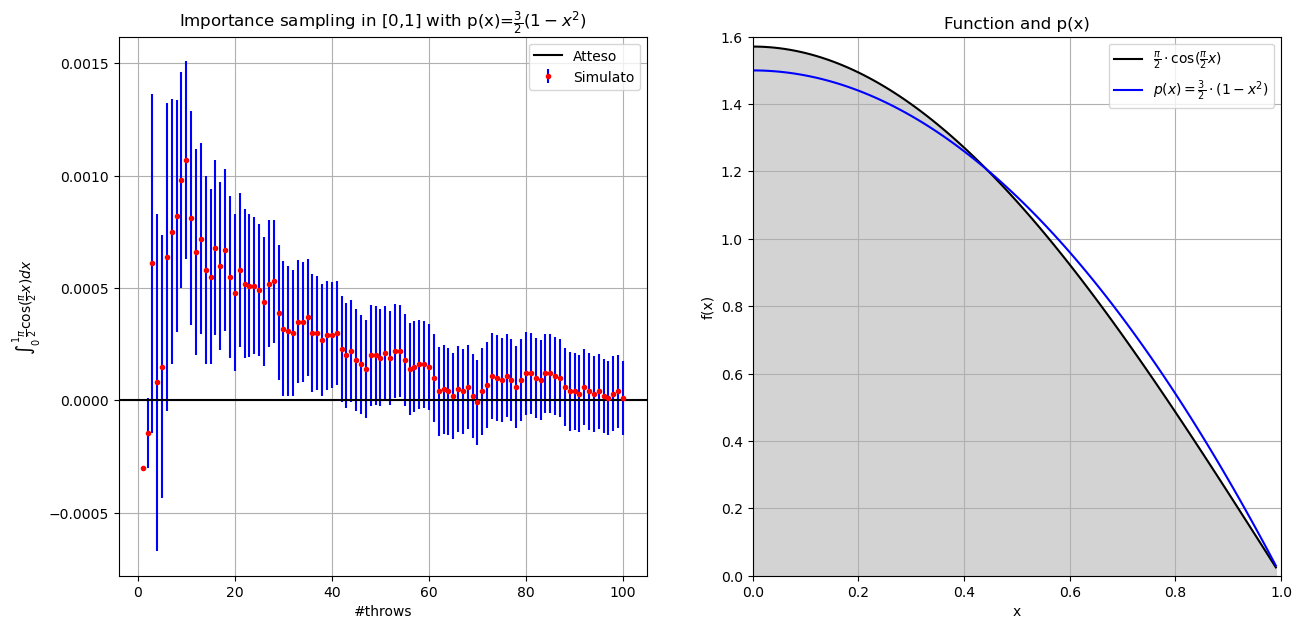

In [13]:
#importance sample with p(x)=3(1-x*x)/2  for x in [0,1]
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

x, y , error = np.loadtxt("data/importance_sample2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
ax1.errorbar(x,y-1,yerr=error, label='Simulato', color='red',ecolor='blue', fmt='.')
ax1.axhline(y=0, color='black', linestyle='-', label='Atteso')  
ax1.set(xlabel='#throws', ylabel=r'$\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x)dx$')
ax1.set_title(r'Importance sampling in [0,1] with p(x)=$\frac{3}{2}(1-x^2)$')

x = np.arange(0,1,0.01) # generate x values from 0 to 1 with step 1
ax2.plot(x,np.pi/2*np.cos(np.pi/2*x), label=r'$\frac{\pi}{2} \cdot \cos(\frac{\pi}{2}x)$', color='black')
ax2.plot(x,3*(1-x*x)/2, color='blue', linestyle='-', label=r'$p(x)=\frac{3}{2} \cdot (1-x^2)$')
ax2.set(xlabel='x', ylabel='f(x)')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1.6)
ax2.fill_between(x,0,np.pi/2*np.cos(np.pi/2*x), color='lightgrey')
ax2.set_title('Function and p(x)')

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.show()

Importance sampling: using p(x) =   $\frac{3}{2} \cdot (1-x^2)$ because it approximate $\frac{\pi}{2}\cos(\pi x/2)$ in $[0,1]$ well

$$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{\frac{3}{2} \cdot (1-x^2)} \cdot \frac{3}{2} \cdot (1-x^2)  \, \mathrm{d}x = 1$$

the variance connected with this choice is
$$\sigma_I^2 = \langle g^2 \rangle_p - \langle g \rangle^2_p = \int_0^1 \left( \frac{\frac{\pi}{2}\cos(\pi x/2)}{\frac{3}{2} \cdot (1-x^2)} \right)^2 \cdot \frac{3}{2} \cdot (1-x^2) \, \mathrm{d}x - I^2 \approx 1.002444-1 = 0.002444 $$

another order of magnitude down

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

[0.99987017]
[0.00013399]


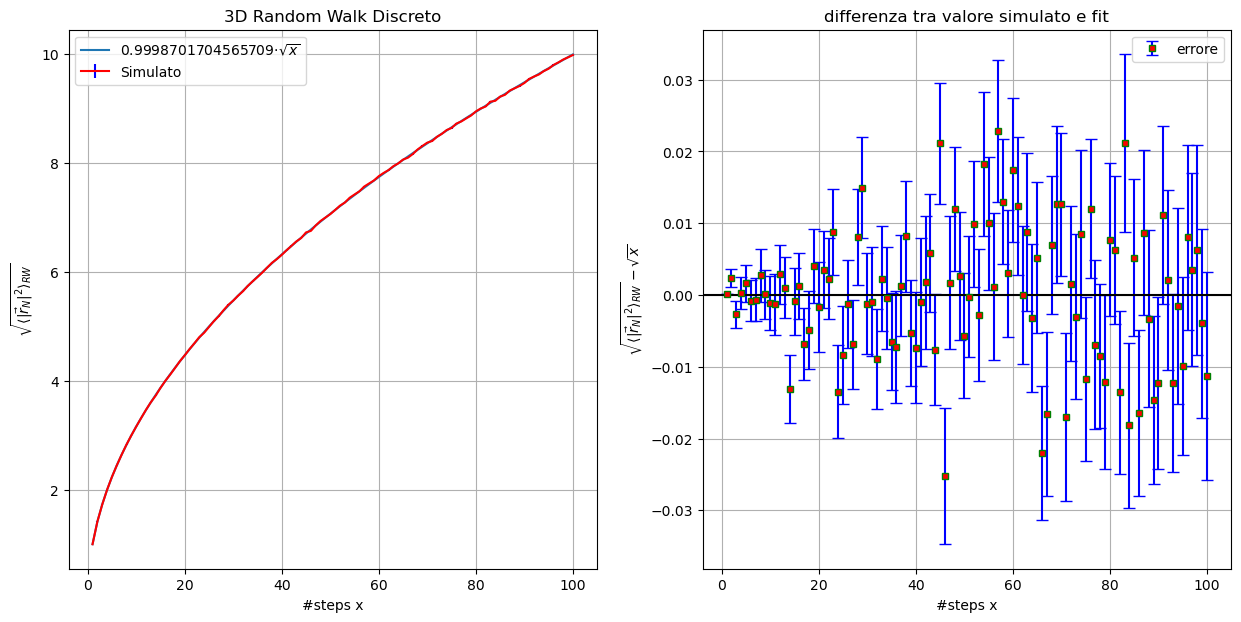

In [31]:
#3D random walk discrete

#fitting function
def f(x,k):
    return k*np.sqrt(x)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

#loading data
x, y , error = np.loadtxt("data/3D_RW_discrete.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#fitting
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x,p_opt[0]) #fitted function


ax1.errorbar(x,y,yerr=error, label='Simulato', color='red',ecolor='blue')
ax1.plot(x,y_fit, label = f'{p_opt[0]}'+r'$\cdot \sqrt{x}$') # plotting fitted function
ax1.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax1.set_title('3D Random Walk Discreto')

#plotting error with the fit
ax2.errorbar(x, y - y_fit, yerr=error, label='errore', color='red',ecolor='blue', fmt ='s',capsize=4,mfc='red',mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-')
ax2.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}- \sqrt{x} $')
ax2.set_title('differenza tra valore simulato e fit')

print(p_opt)
print(np.sqrt(np.diag(p_cov)))
for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.show()

[1.00000596]
[0.00011135]


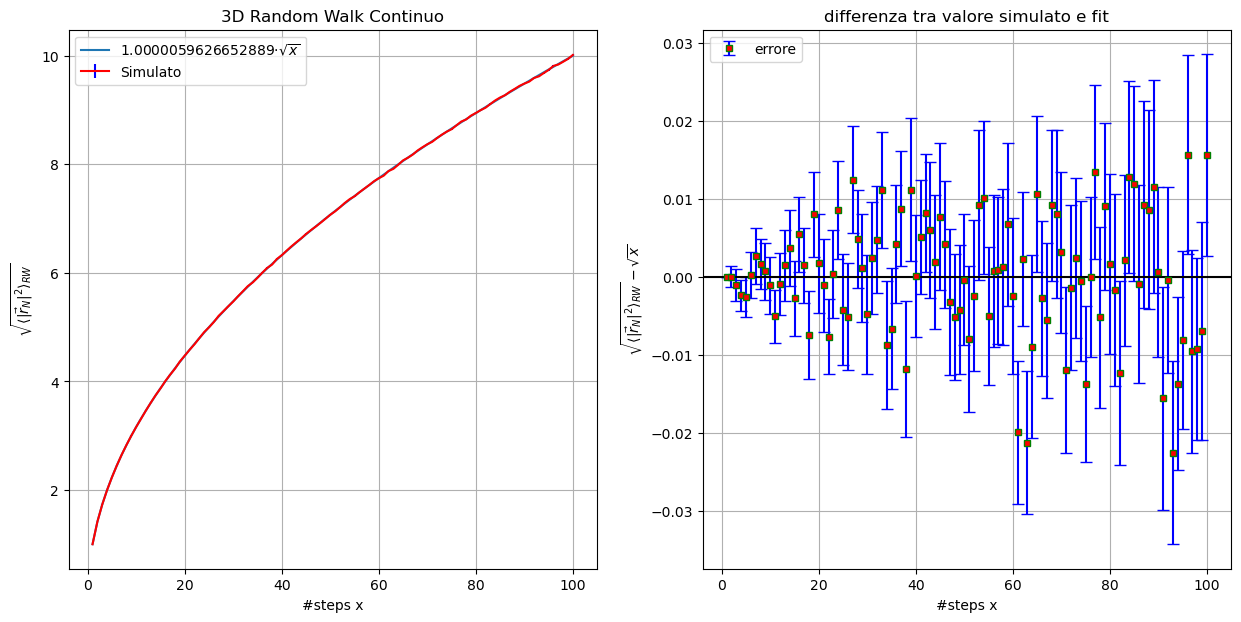

In [30]:
#3D random walk continuum

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

#loading data
x, y , error = np.loadtxt("data/3D_RW_continuum.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#fitting
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x,p_opt[0]) #fitted function


ax1.errorbar(x,y,yerr=error, label='Simulato', color='red',ecolor='blue')
ax1.plot(x,y_fit, label = f'{p_opt[0]}'+r'$\cdot \sqrt{x}$') # plotting fitted function
ax1.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax1.set_title('3D Random Walk Continuo')

#plotting error with the fit
ax2.errorbar(x,y-y_fit, yerr=error, label='errore', color='red',ecolor='blue', fmt ='s',capsize=4,mfc='red',mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-')
ax2.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}- \sqrt{x}$')
ax2.set_title('differenza tra valore simulato e fit')

print(p_opt)
print(np.sqrt(np.diag(p_cov)))

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.show()

$$ \sigma_ {S_N} = \sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}= \sqrt{\frac{2D}{t}} = \sqrt{t}$$ 
since we do one step $x$ every time tick $\tau = 1$ and the lattice spacing is $a = 1$, then

$$ D = \frac{a^2}{2\tau} = \frac{1}{2}$$

The previous RW were done starting from the origin each time.
Now we repeat the simulation with RW that continues their previous paths and we observe that for extended time periods the distance from origin is above and below the average. The graph above were more erratic.

[1.00004706]
[5.30838658e-05]


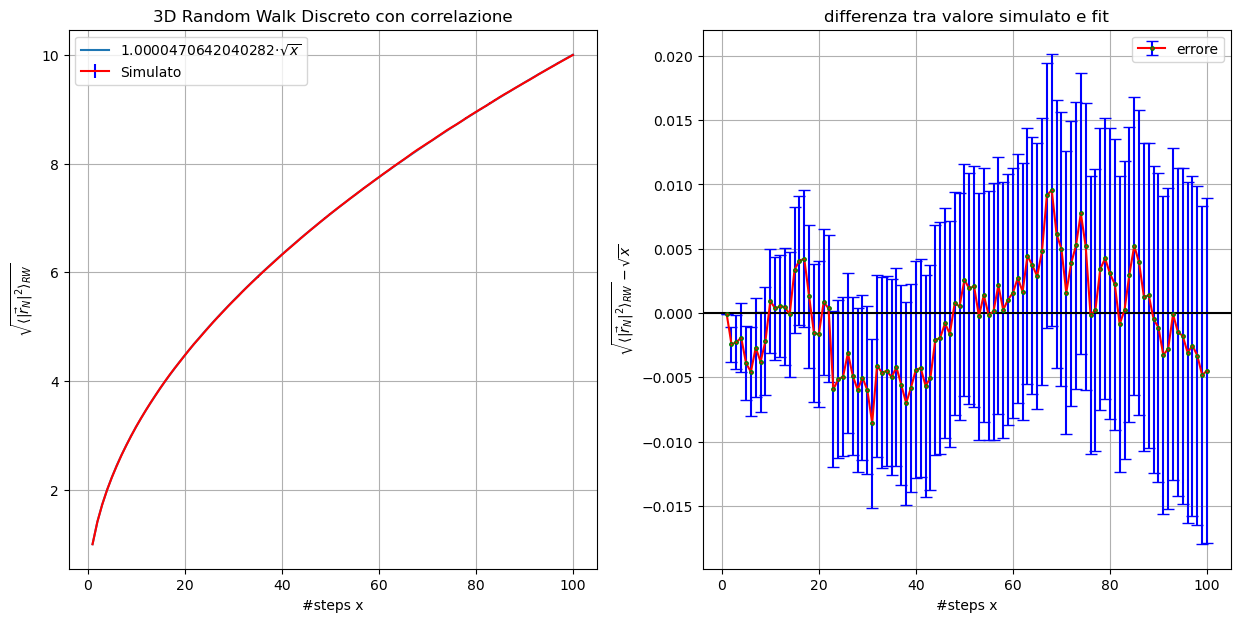

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

#loading data
x, y , error = np.loadtxt("data/3D_RW_discrete_corr.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#fitting
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x,p_opt[0]) #fitted function


ax1.errorbar(x,y,yerr=error, label='Simulato', color='red',ecolor='blue')
ax1.plot(x,y_fit, label = f'{p_opt[0]}'+r'$\cdot \sqrt{x}$') # plotting fitted function
ax1.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax1.set_title('3D Random Walk Discreto con correlazione')

#plotting error with the fit
ax2.errorbar(x, y - y_fit, yerr=error, label='errore', color='red',ecolor='blue', fmt ='.-',capsize=4,mfc='red',mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-')
ax2.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}- \sqrt{x} $')
ax2.set_title('differenza tra valore simulato e fit')

print(p_opt)
print(np.sqrt(np.diag(p_cov)))
for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.show()

[0.99806686]
[0.00010426]


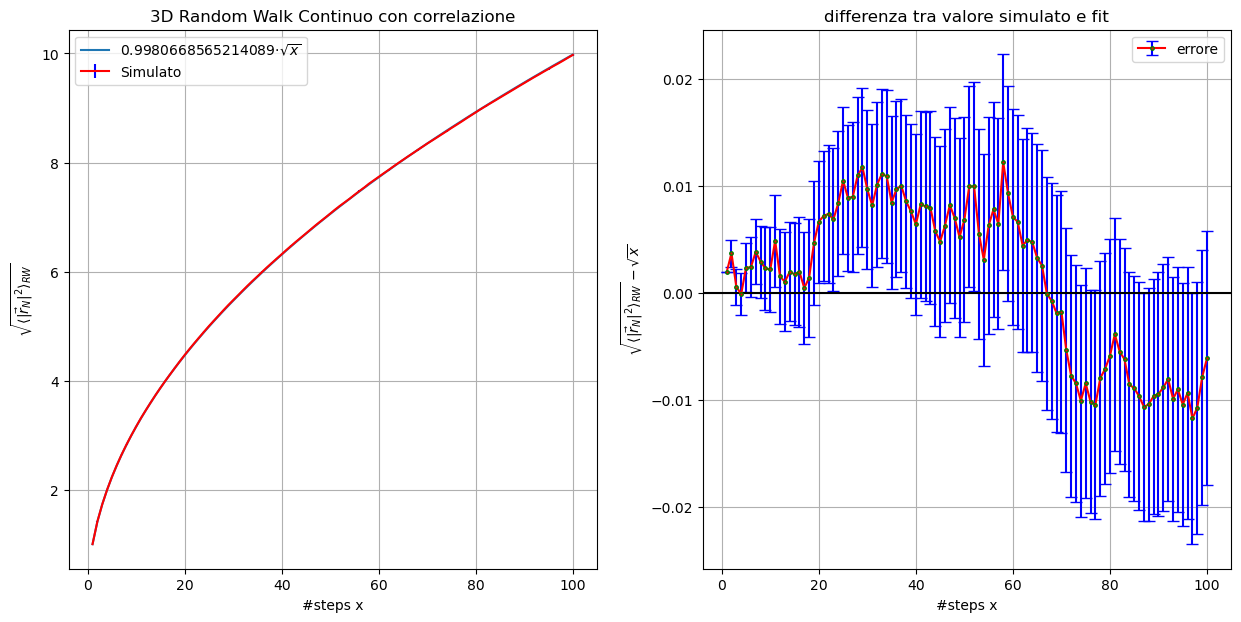

In [26]:
#3D random walk continuum con correlazione

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

#loading data
x, y , error = np.loadtxt("data/3D_RW_continuum_corr.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#fitting
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x,p_opt[0]) #fitted function


ax1.errorbar(x,y,yerr=error, label='Simulato', color='red',ecolor='blue',)
ax1.plot(x,y_fit, label = f'{p_opt[0]}'+r'$\cdot \sqrt{x}$') # plotting fitted function
ax1.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
ax1.set_title('3D Random Walk Continuo con correlazione')

#plotting error with the fit
ax2.errorbar(x,y-y_fit, yerr=error, label='errore', color='red',ecolor='blue',capsize=4,fmt='.-',mfc='red',mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-')
ax2.set(xlabel='#steps x', ylabel=r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}- \sqrt{x}$')
ax2.set_title('differenza tra valore simulato e fit')

print(p_opt)
print(np.sqrt(np.diag(p_cov)))

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.show()